In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp  

print("numpy version: {}".format(np.__version__))
print("pandas version: {}".format(pd.__version__))

numpy version: 1.18.1
pandas version: 1.0.3


In [7]:
salary = pd.read_excel("./salary.xlsx")
salary.head()

,salary,years,gender
0,88.0,11,1
1,77.3,6,1
2,75.3,7,0
3,96.4,20,0
4,87.7,8,1


In [8]:
salary.describe()

,salary,years,gender
count,35.000000,35.000000,35.000000
mean,82.965714,10.257143,0.485714
std,13.383395,5.637808,0.507093
min,58.100000,2.000000,0.000000
25%,75.050000,6.000000,0.000000
50%,83.800000,8.000000,0.000000
75%,94.150000,14.000000,1.000000
max,104.500000,21.000000,1.000000


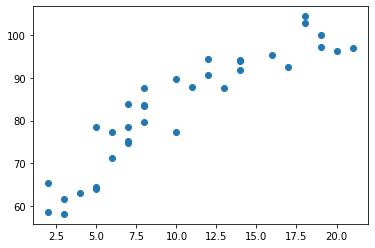

In [9]:
x = salary["years"]
y = salary["salary"]

plt.scatter(x, y)

## Model 1:  SLR with intercept $a$ fixed $\Rightarrow \hat{y_i} = 50 + bx_i$ 

(a) Express Error function $E(b)$ in terms of b only. Hence, derive $E'(b)$.

In [10]:
n = salary["salary"].count()
y = salary["salary"]
x = salary["years"]

In [11]:
b = sp.symbols("b")
E1 = (1/n)*sum( ((y[i] - (50 + b * x[i]))**2) for i in range(n))
sp.simplify(E1)

136.085714285714*b**2 - 810.085714285715*b + 1260.736

In [12]:
sp.diff(E1)

272.171428571428*b - 810.085714285715

(b) Use univariate gradient descent algorithm to find the value of b for which 𝐸(𝑏) is at its minimum. Write your Python code in a single cell and copy-paste your code below.

In [109]:
b_1 = 0
rate = 0.001
epsilon = 0.001
diff = 1
max_iter = 1000
iter = 1
E1 = lambda b: 136.085714285714 * (b**2) - 810.085714285715 * b + 1260.736
E1_deriv = lambda b: 272.171428571428 * 𝑏 - 810.085714285715

while diff > epsilon and iter < max_iter:
    b_new = b_1 - rate * E1_deriv(b_1)
    print("Iteration ", iter, ": b-value is: ", b_new,"E(b) is: ", E1(b_new) )
    diff = abs(b_new - b_1)
    iter = iter + 1
    b_1 = b_new
    
print("The local minimum occurs at: ", b_1)

Iteration  1 : b-value is:  0.810085714285715 E(b) is:  693.8018701263429
Iteration  2 : b-value is:  1.3996892424489813 E(b) is:  393.47734233727715
Iteration  3 : b-value is:  1.8288195360612973 E(b) is:  234.3850999777892
Iteration  4 : b-value is:  2.1411528246178726 E(b) is:  150.10846175146776
Iteration  5 : b-value is:  2.368477915837593 E(b) is:  105.46422488992835
Iteration  6 : b-value is:  2.5339316122299116 E(b) is:  81.81463555062919
Iteration  7 : b-value is:  2.6543535397127096 E(b) is:  69.28663383672097
Iteration  8 : b-value is:  2.7420000591611897 E(b) is:  62.650119997434786
Iteration  9 : b-value is:  2.8057917002020636 E(b) is:  59.13453012565651
Iteration  10 : b-value is:  2.852221079169927 E(b) is:  57.27220113096905
Iteration  11 : b-value is:  2.886013707736423 E(b) is:  56.28566134363564
Iteration  12 : b-value is:  2.910608948310792 E(b) is:  55.76305725232464
Iteration  13 : b-value is:  2.928510067121977 E(b) is:  55.486215872218054
Iteration  14 : b-valu

## Model 2:  SLR $\Rightarrow \hat{ y_i } = a + b x_i$ 

In [14]:
a, b = sp.symbols("a b")
E2 = (1/n)*sum( ((y[i] - (a + b * x[i]))**2) for i in range(n))
sp.simplify(E2)

1.0*a**2 + 20.5142857142857*a*b - 165.931428571429*a + 136.085714285714*b**2 - 1835.8*b + 7057.30742857143

In [15]:
partial_a = sp.diff(E2, a)
partial_a

2.0*a + 20.5142857142857*b - 165.931428571429

In [16]:
partial_b = sp.diff(E2, b)
partial_b

20.5142857142857*a + 272.171428571428*b - 1835.8

In [106]:
a_2 = 60 # Initial point
b_2 = 2.9 # Initial point
alpha = 0.001 # Learning rate
epsilon = 0.001 # Stopping criterion constant
max_iters = 1000 # Maximum number of iterations

# Partial derivatives and function
E2 = lambda a,b: 1.0 * a**2 +20.5142857142857*a*b - 165.931428571429 * a + 136.085714285714 * b**2 - 1835.8 * b + 7057.30742857143
partialf_a = lambda a,b: 2.0 * a + 20.5142857142857 * b - 165.931428571429
partialf_b = lambda a,b: 20.5142857142857 * a + 272.171428571428* b - 1835.8
              
for n in range(max_iters):
    a_n = a_2 - alpha * partialf_a(a_2, b_2)
    b_n = b_2 - alpha * partialf_b(a_2, b_2)
    print("Iteration", n+1, ": a = ", a_n, ", b = ", b_n, ", E(a,b) = ", E2(a_n, b_n))
    diff = abs(E2(a_n, b_n)-E2(a_2, b_2))
    a_2 = a_n
    b_2 = b_n
    if diff < epsilon:
        print("The local minimum occurs at iteration {} a={}, b={}, E(a,b)={}".format(n+1, a_2, b_2, E2(a_2,b_2)))
        break
    if n+1 == max_iters:
        print("Did not converge after {} iterations".format(max_iters))

Iteration 1 : a =  59.98644 , b =  2.7156457142857167 , E(a,b) =  62.074453333760175
Iteration 2 : a =  59.9766890164898 , b =  2.5817455715918407 , E(a,b) =  46.51691771528385
Iteration 3 : a =  59.969704400731025 , b =  2.4844892564825987 , E(a,b) =  38.310532433484696
Iteration 4 : a =  59.96472889803943 , b =  2.413846615997512 , E(a,b) =  33.981749110957935
Iteration 5 : a =  59.96121252966375 , b =  2.362532952775097 , E(a,b) =  31.698332357486834
Iteration 6 : a =  59.95875585717321 , b =  2.325257538362695 , E(a,b) =  30.493810380961804
Iteration 7 : a =  59.95706877652902 , b =  2.298177823622886 , E(a,b) =  29.8583863889271
Iteration 8 : a =  59.95594059105136 , b =  2.278503042783475 , E(a,b) =  29.523151581605816
Iteration 9 : a =  59.955218276020155 , b =  2.2642063190711843 , E(a,b) =  29.34626131879304
Iteration 10 : a =  59.954790692694026 , b =  2.2538155728524845 , E(a,b) =  29.252895059176808
Iteration 11 : a =  59.954577123271264 , b =  2.24626166244257 , E(a,b) =  

## Model 3:  MLR $\Rightarrow \hat{ y_i } = a + bx_i +c g_i$ 

In [18]:
n = salary["salary"].count()
y = salary["salary"]
x = salary["years"]
g = salary["gender"]

In [19]:
a, b, c = sp.symbols("a b c")
E3 = (1/n)*sum( ((y[i] - (a + b * x[i] + c * g[i]))**2) for i in range(n))
sp.simplify(E3)

1.0*a**2 + 20.5142857142857*a*b + 0.971428571428571*a*c - 165.931428571429*a + 136.085714285714*b**2 + 10.1142857142857*b*c - 1835.8*b + 0.485714285714286*c**2 - 84.1657142857143*c + 7057.30742857143

In [20]:
partial_a = sp.diff(E3, a)
partial_a

2.0*a + 20.5142857142857*b + 0.971428571428572*c - 165.931428571429

In [21]:
partial_b = sp.diff(E3, b)
partial_b

20.5142857142857*a + 272.171428571428*b + 10.1142857142857*c - 1835.8

In [22]:
partial_c = sp.diff(E3, c)
partial_c

0.971428571428572*a + 10.1142857142857*b + 0.971428571428572*c - 84.1657142857143

In [107]:
a_3 =60 # Initial point
b_3 = 2.9 # Initial point
c_3 = 6 # Initial point
alpha = 0.001 # Learning rate
epsilon = 0.001 # Stopping criterion constant
max_iters = 1000 # Maximum number of iterations

# Partial derivatives and function
E3 = lambda a,b,c: 1.0*a**2 + 20.5142857142857*a*b + 0.971428571428571*a*c - 165.931428571429*a + 136.085714285714*b**2 +10.1142857142857*b*c - 1835.8*b + 0.485714285714286*c**2 - 84.1657142857143*c + 7057.30742857143
partialf_a = lambda a,b,c: 2.0*a + 20.5142857142857*b +0.971428571428572*c - 165.931428571429
partialf_b = lambda a,b,c: 20.5142857142857*a + 272.171428571428*b + 10.1142857142857*c - 1835.8
partialf_c = lambda a,b,c: 0.971428571428572*a + 10.1142857142857*b + 0.971428571428572*c - 84.1657142857143

for n in range(max_iters):
    a_n = a_3 - alpha * partialf_a(a_3, b_3, c_3)
    b_n = b_3 - alpha * partialf_b(a_3, b_3, c_3)
    c_n = c_3 - alpha * partialf_c(a_3, b_3, c_3)

    print("Iteration", n+1, ": a = ", a_n, ", b = ", b_n, ", c = ", c_n, ", E(a,b,c) = ", E3(a_n, b_n, c_n))
    diff = abs(E3(a_n, b_n, c_n)-E3(a_3, b_3, c_3))
    a_3 = a_n
    b_3 = b_n
    c_3 = c_n

    if diff < epsilon:
        print("The minimum occurs at iteration {} a={}, b={}, c={}, E(a,b,c)={}".format(n+1, a_3, b_3, c_3, E3(a_3,b_3,c_3)))
        break
    if n+1 == max_iters:
        print("Did not converge after {} iterations".format(max_iters))

Iteration 1 : a =  59.98061142857143 , b =  2.6549600000000027 , c =  5.99072 , E(a,b,c) =  77.54820221921273
Iteration 2 : a =  59.966297469714284 , b =  2.4771044901224535 , c =  5.9839462540408155 , E(a,b,c) =  50.034321479254686
Iteration 3 : a =  59.955667297730706 , b =  2.3480183206912617 , c =  5.9789918747233575 , E(a,b,c) =  35.53595917415896
Iteration 4 : a =  59.94771130947819 , b =  2.254333898796187 , c =  5.975358249083696 , E(a,b,c) =  27.895911628495924
Iteration 5 : a =  59.94169663200768 , b =  2.186347662787234 , c =  5.972683432936126 , E(a,b,c) =  23.869741159376645
Iteration 6 : a =  59.93709127135506 , b =  2.137015778422891 , c =  5.970704690226561 , E(a,b,c) =  21.747844441278176
Iteration 7 : a =  59.933509052001625 , b =  2.1012251127534762 , c =  5.969231300276404 , E(a,b,c) =  20.62937398780923
Iteration 8 : a =  59.93066964832144 , b =  2.0752640326470604 , c =  5.968124818508056 , E(a,b,c) =  20.039642962553444
Iteration 9 : a =  59.92836957133137 , b = 

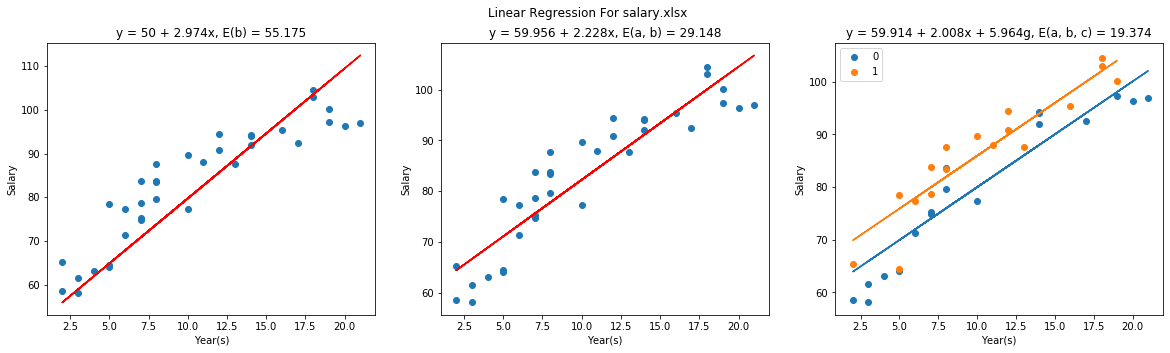

In [110]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
plt.suptitle("Linear Regression For salary.xlsx")

ax1 = ax[0]
ax1.scatter(x, y)
y_pred_1 = 50 + b_1 * x
ax1.plot(x, y_pred_1, 'r')
ax1.set_title("y = 50 + {:.3f}x, E(b) = {:.3f}".format(b_1, E1(b_1)))
ax1.set_xlabel("Year(s)")
ax1.set_ylabel("Salary")

ax2 = ax[1]
ax2.scatter(x, y)
y_pred_2 = a_2 + b_2 * x
ax2.plot(x, y_pred_2, 'r')
ax2.set_title("y = {:.3f} + {:.3f}x, E(a, b) = {:.3f}".format(a_2, b_2, E2(a_2, b_2)))
ax2.set_xlabel("Year(s)")
ax2.set_ylabel("Salary")

ax3 = ax[2]
for gender in np.unique(g):
    ix = np.where(gender == g)
    y_pred_3 = a_3 + b_3 * np.array(x)[ix] + c_3 * np.array(g)[ix]
    ax3.scatter(np.array(x)[ix], np.array(y)[ix], label = gender)
    ax3.plot(np.array(x)[ix], y_pred_3)
ax3.set_title('y = {:.3f} + {:.3f}x + {:.3f}g, E(a, b, c) = {:.3f}'.format(a_3, b_3, c_3, E3(a_3, b_3, c_3)))
ax3.set_xlabel("Year(s)")
ax3.set_ylabel("Salary")
ax3.legend()

plt.show()